In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams.update({'font.size': 30})
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
import pandas as pd
import os
import glob
import re

In [6]:
directory = r'C:\Users\lenovo\Documents\Masterarbeit\Programming\output'

In [7]:
# Function to create contour plot
def plot_contour(ax, df, xlabel, ylabel, vmin, vmax, levels):
    print(df.columns)
    df_pivot = df.pivot(index=1, columns=0, values=2)
    X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
    Z = df_pivot.values

    # Create contour plot with a consistent color scale
    ax.contourf(X, Y, Z, levels=levels, cmap='viridis', vmin=0, vmax=vmax)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

[0.6356, 0.637, 0.63898, 0.64173, 0.64561, 0.65106, 0.65877, 0.73603, 0.75152, 0.88414, 0.91744, 0.96067, 1.0098, 1.0541, 1.155, 0.6427, 0.64417, 0.64624, 0.64913, 0.65321, 0.72893, 0.73709, 0.8549, 0.87326, 0.89897, 0.93331, 0.97446, 1.0929, 1.2647, 1.3723, 0.64941, 0.65092, 0.65305, 0.65605, 0.7338, 0.73974, 0.85203, 0.86563, 0.88501, 0.91191, 0.94674, 1.0677, 1.2397, 1.5085, 1.7852, 0.65572, 0.65727, 0.65944, 0.73952, 0.74378, 0.85133, 0.86117, 0.87534, 0.89554, 0.92332, 1.0442, 1.2125, 1.4891, 1.7767, 2.3504, 0.66164, 0.66321, 0.74584, 0.74885, 0.85239, 0.8594, 0.86953, 0.88417, 0.90505, 1.0233, 1.1831, 1.3234, 1.5003, 2.0639, 2.5086, 0.66717, 0.66875, 0.75463, 0.75763, 0.85966, 0.86681, 0.87719, 0.89223, 0.91367, 1.035, 1.1946, 1.4757, 1.7734, 2.5095, 2.5223, 0.67231, 0.76079, 0.76289, 0.86131, 0.86634, 0.87361, 0.8842, 0.89961, 1.0177, 1.1656, 1.3108, 1.4867, 2.0645, 2.5241, 2.5344, 0.67706, 0.76857, 0.77065, 0.86736, 0.87245, 0.87983, 0.89064, 0.90638, 1.0275, 1.1751, 1.456, 1.7

IndexError: index 4 is out of bounds for axis 0 with size 4

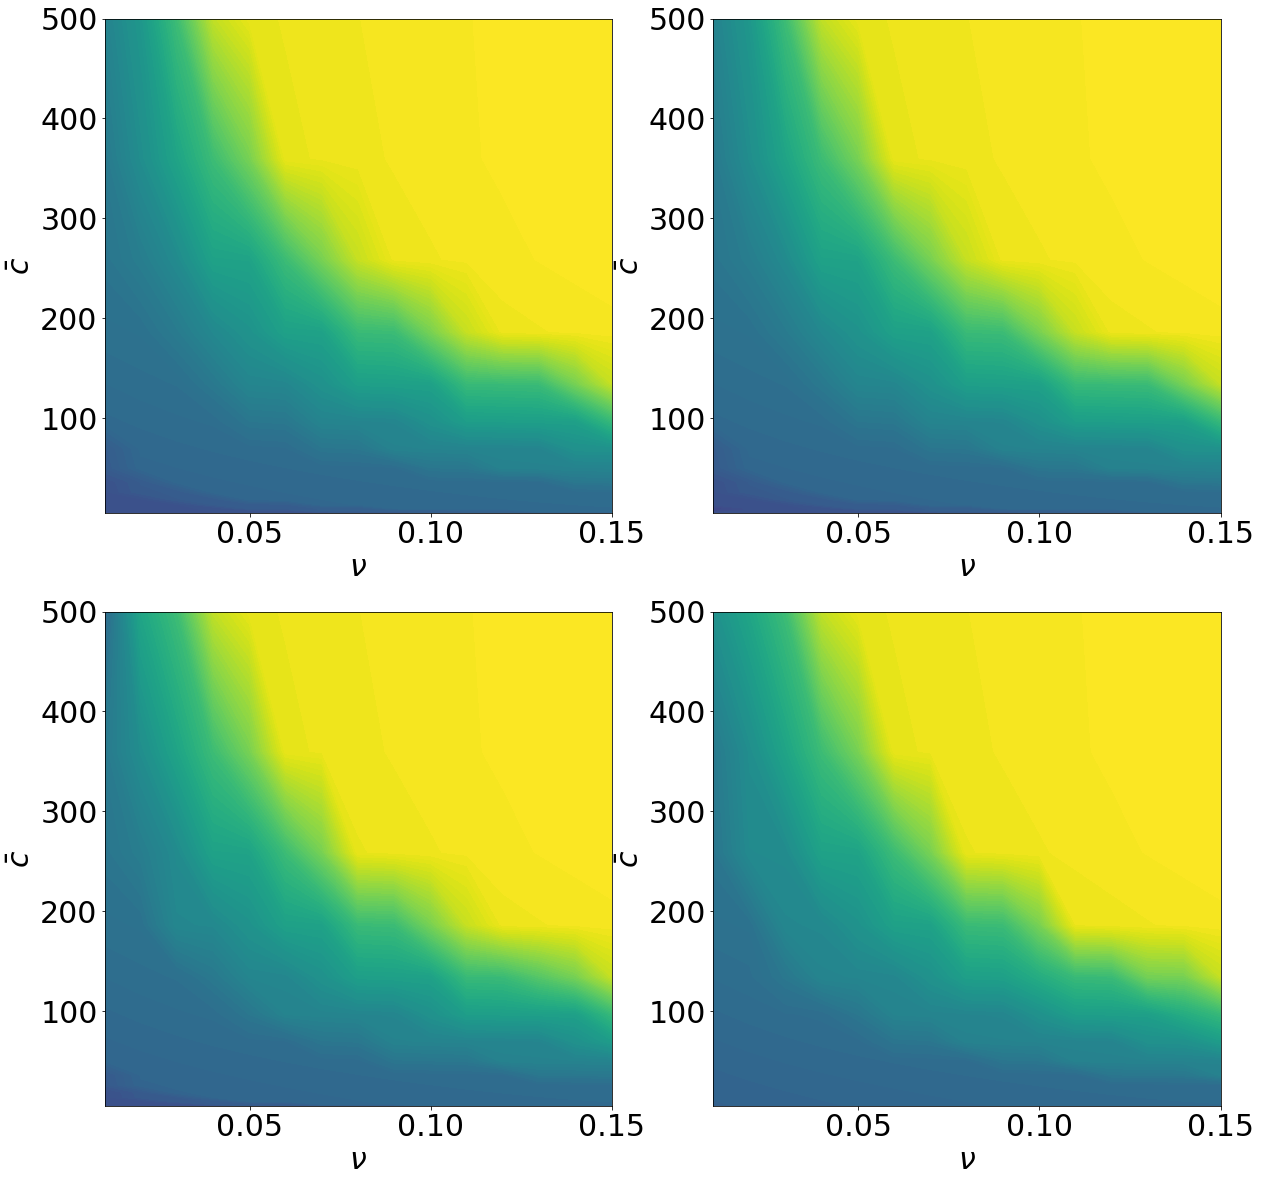

In [8]:
score_dir = os.path.join(directory, "Score_small_a")

# Get all score files in directory
score_files = [f for f in os.listdir(score_dir) if f.startswith("Score") and f.endswith(".csv")]

# Extract param values dynamically
param_values_list = [f.replace("Score", "").replace(".csv", "") for f in score_files]

# Determine global min/max for consistent color scale
all_scores = []

for file_name in score_files:
    file_path = os.path.join(score_dir, file_name)
    df = pd.read_csv(file_path, header=None)
    all_scores.extend(df[2].values)  # Collect all score values

print(all_scores)
# Global colorbar settings
vmin, vmax = min(all_scores), max(all_scores)
levels = np.linspace(0, vmax, 100)

# Create figure and axes
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax = ax.flatten()

# Plot each dataset
for j, file_name in enumerate(score_files):
    file_path = os.path.join(score_dir, file_name)
    df = pd.read_csv(file_path, header=None)
    print('Errors:', df[3].drop_duplicates().values)  # Ensure no error values cause issues
    plot_contour(ax[j], df, r'$\nu$', r'$\bar{c}$', vmin, vmax, levels)  # Use shared vmin/vmax

# Colorbar
norm = colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax.ravel().tolist(), orientation='vertical')
cbar.set_label(r"$\mathcal{S}$")

# Save and show the figure
plt.savefig('figures/score_small_a.svg', dpi=300)
plt.show()

Errors: [0]
Errors: [0]
Errors: [0]
Errors: [0]


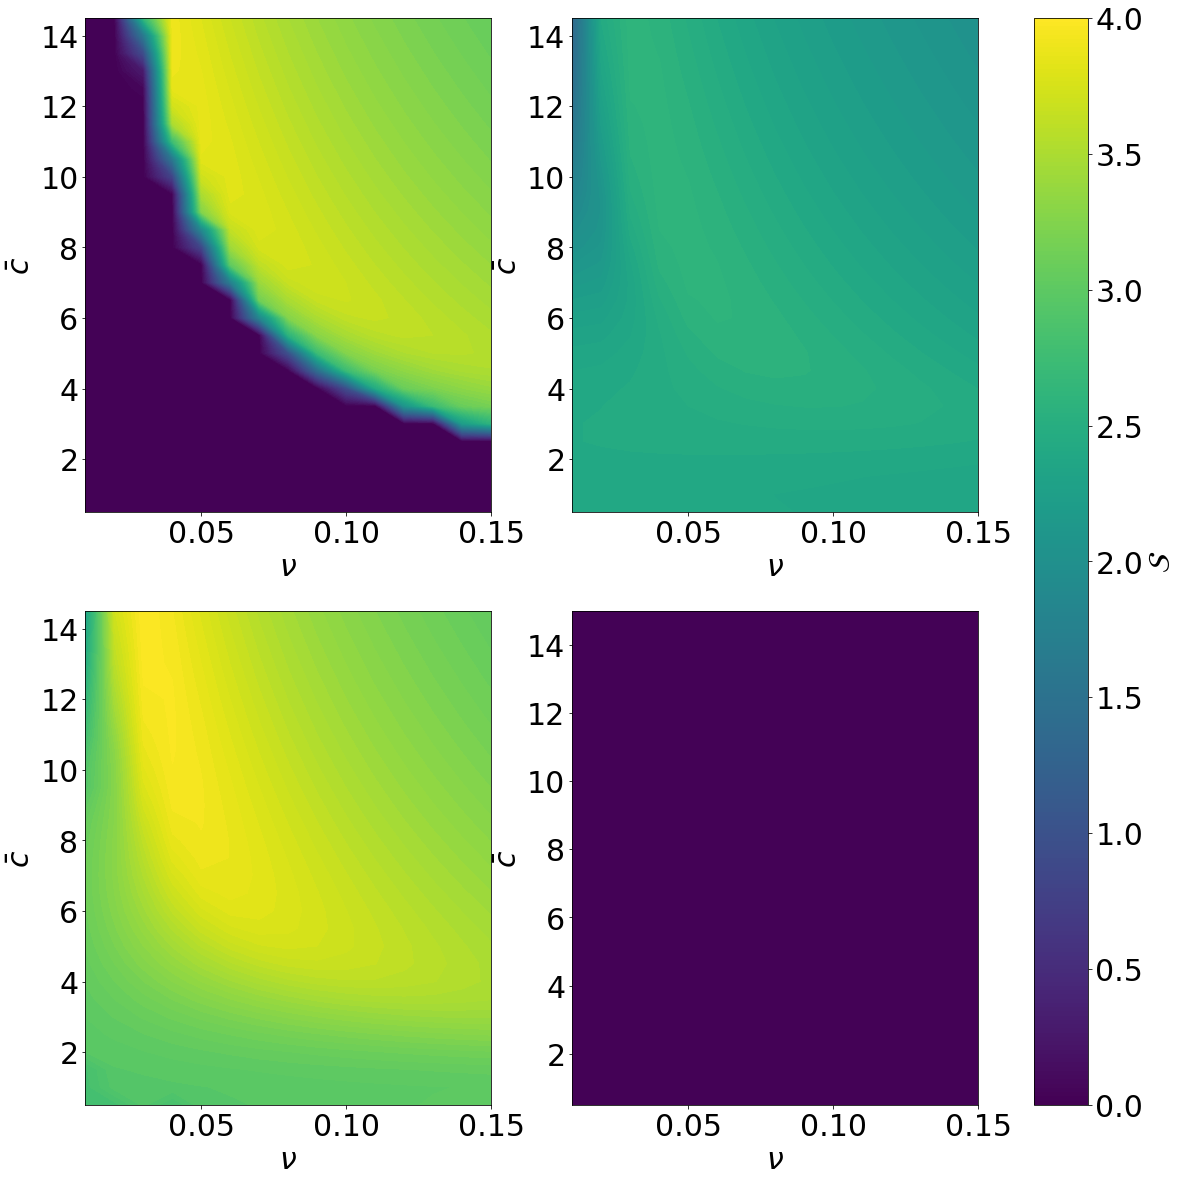

In [4]:
# Parameter sets
param_values_list = ["_1.00_-3.00", "_1.50_-1.00", "_1.50_-3.00", ""]

# Determine global min/max for consistent color scale
all_scores = []

for param_values in param_values_list:
    file_path = os.path.join(directory, 'Score_zeta_0', f'Score{param_values}.csv')
    df = pd.read_csv(file_path, header=None)
    df = df[df[1] >= 0.25]
    all_scores.extend(df[2].values)  # Collect all score values

# global colorbar
vmin, vmax = 0, max(all_scores)
levels = np.linspace(0, vmax, 100)

# Create figure and axes
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax = ax.flatten()

# Plot each dataset
for j, param_values in enumerate(param_values_list):
    file_path = os.path.join(directory, 'Score_zeta_0', f'Score{param_values}.csv')
    df = pd.read_csv(file_path, header=None)
    df = df[df[1] >= 0.25]
    
    print('Errors:', df[3].drop_duplicates().values)  # Ensure no error values cause issues

    plot_contour(ax[j], df, r'$\nu$', r'$\bar{c}$', vmin, vmax, levels)  # Use shared vmin/vmax

    
# Colorbar
norm = colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax.ravel().tolist(), orientation='vertical')
cbar.set_label(r"$\mathcal{S}$")

# Save and show the figure
plt.savefig('figures/score_zeta_0.svg', dpi=300)
plt.show()

# Overview

In [ ]:
# absolute score scale? Score relative to initial conditions
# optimum for zeta: below - too many slow modes; above - constriction too fast -> too close to initial condtitions
# Plot with slow modes into supp info

In [41]:
columns = ['C0', 'epsilon', 'n', 'c', 'k', 'zeta', 's', 'error', 'slow mode']

def merge_csv_files(directory):
    all_files = [os.path.join(directory, 'Score', f) for f in os.listdir(os.path.join(directory, 'Score')) if f.endswith('.csv')]
    df_list = [pd.read_csv(f, header = None) for f in all_files]
    merged_df = pd.concat(df_list, ignore_index=True)
    
    return merged_df

# Merge CSV files
df = merge_csv_files(directory)


In [44]:
df

,0,1,2,3,4,5,6,7,8
0,0.5,-1,0.01,0.01,0.2,0.0,0.0000,0.0,0
1,0.5,-1,0.01,0.51,0.2,0.0,0.0000,0.0,0
2,0.5,-1,0.01,1.01,0.2,0.0,0.0000,0.0,0
3,0.5,-1,0.01,1.51,0.2,0.0,0.0000,0.0,0
4,0.5,-1,0.01,2.01,0.2,0.0,0.0000,0.0,0
...,...,...,...,...,...,...,...,...,...
5739,1.5,-3,0.15,2.51,2.0,0.0,3.0893,0.0,0
5740,1.5,-3,0.15,3.01,2.0,0.0,2.9548,0.0,0
5741,1.5,-3,0.15,3.51,2.0,0.0,2.8306,0.0,0
5742,1.5,-3,0.15,4.01,2.0,0.0,2.7201,0.0,0


In [43]:
df[7].drop_duplicates()

0      0.000000
24     0.032258
152    0.064516
295    0.096774
305    0.290320
306    0.419350
314    0.129030
315    0.387100
316    0.483870
317    0.322580
319    0.354840
322    0.225810
323    0.161290
324    0.677420
325    0.612900
327    0.580650
328    0.548390
329    0.451610
331    0.709680
338    0.741940
343    0.645160
344    0.516130
346    0.774190
372    0.258060
456    0.193550
Name: 7, dtype: float64

In [46]:
df[df[7]==0].sort_values(by=6)

,0,1,2,3,4,5,6,7,8
0,0.5,-1,0.01,0.01,0.2,0.0,0.0000,0.0,0
2727,1.0,-1,0.07,1.01,0.2,0.0,0.0000,0.0,1
2733,1.0,-1,0.07,1.51,0.2,0.0,0.0000,0.0,1
2739,1.0,-1,0.07,2.01,0.2,0.0,0.0000,0.0,0
2740,1.0,-1,0.07,2.51,0.2,0.0,0.0000,0.0,0
...,...,...,...,...,...,...,...,...,...
4797,1.0,-3,0.12,4.01,2.0,0.0,3.7544,0.0,0
4726,1.0,-3,0.10,4.51,2.0,0.0,3.7842,0.0,0
4761,1.0,-3,0.11,4.01,2.0,0.0,3.7853,0.0,0
4832,1.0,-3,0.13,3.51,2.0,0.0,3.7960,0.0,0


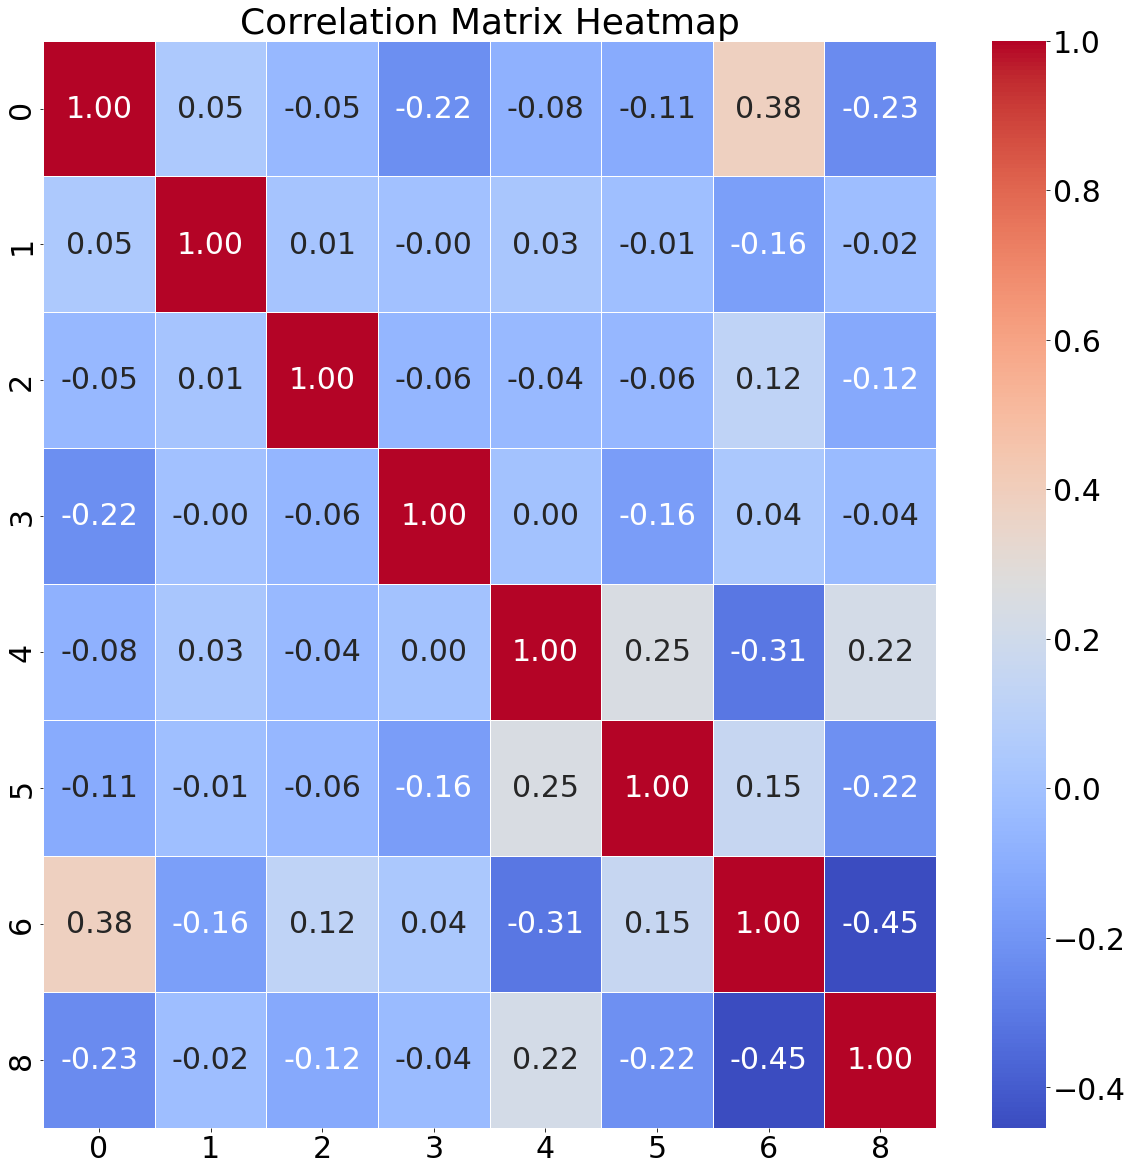

In [50]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df[[0,1,2,3,4,5,6,8]].corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Matrix Heatmap")
plt.show()